In [9]:
import pandas as pd
import numpy as np

In [10]:
df=pd.read_csv("E:\Car Price Prediction\data\cars_data_clean.csv")

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\vikas\AppData\Local\Temp\ipykernel_8340\4270376398.py:1: SyntaxWarning: invalid escape sequence '\C'
  df=pd.read_csv("E:\Car Price Prediction\data\cars_data_clean.csv")


In [11]:

pd.set_option('display.max_columns', None)
df.head()

,usedCarSkuId,loc,myear,body,transmission,fuel,km,ip,images,imgCount,threesixty,dvn,oem,model,variant,City,listed_price,discountValue,utype,carType,top_features,comfort_features,interior_features,exterior_features,safety_features,Color,Engine Type,No of Cylinder,Valves per Cylinder,Valve Configuration,Turbo Charger,Super Charger,Length,Width,Height,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Gross Weight,Gear Box,Drive Type,Seats,Steering Type,Turning Radius,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,Doors,Cargo Volume,model_type_new,state,exterior_color,owner_type,Fuel Suppy System,Compression Ratio,Alloy Wheel Size,Ground Clearance Unladen,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At,Bore,Stroke
0,7111bf25-97af-47f9-867b-40879190d800,gomti nagar,2016,hatchback,manual,cng,69162.0,0,[{'img': 'https://images10.gaadi.com/usedcar_i...,15,False,maruti wagon r lxi cng,maruti,maruti wagon r,lxi cng,lucknow,370000.0,0,dealer,corporate,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'rem...","['air conditioner', 'heater', 'digital odomete...","['adjustable head lights', 'manually adjustabl...","['centeral locking', 'child safety locks', 'da...",silver,k10b engine,3.0,4.0,dohc,False,False,3599.0,1495.0,1700.0,2400.0,1295.0,1290.0,960.0,1350.0,5 speed,fwd,5.0,power,4.6,ventilated disc,drum,137.0,15.90,tubeless,5.0,180.0,used,uttar pradesh,silver,first,NaN,NaN,NaN,NaN,58.16,6200.0,77.0,3500.0,69.0,NaN
1,c309efc1-efaf-4f82-81ad-dcb38eb36665,borivali west,2015,hatchback,manual,cng,45864.0,0,[{'img': 'https://images10.gaadi.com/usedcar_i...,15,False,maruti celerio green vxi,maruti,maruti celerio,green vxi,mumbai,365000.0,0,dealer,corporate,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'digital odomete...","['adjustable head lights', 'manually adjustabl...","['centeral locking', 'child safety locks', 'da...",grey,k10b engine,3.0,4.0,dohc,False,False,3600.0,1600.0,1560.0,2425.0,1420.0,1410.0,915.0,1350.0,5 speed,fwd,5.0,power,4.7,ventilated disc,drum,150.0,15.05,tubeless radial,5.0,235.0,used,maharashtra,grey,first,Gasoline Port Injection,11.0,NaN,NaN,58.20,6000.0,78.0,3500.0,73.0,NaN
2,7609f710-0c97-4f00-9a47-9b9284b62d3a,jasola,2015,sedan,manual,cng,81506.0,0,[{'img': 'https://images10.gaadi.com/usedcar_i...,15,False,honda amaze s plus i-vtec,honda,honda amaze,s plus i-vtec,new delhi,421000.0,0,dealer,corporate,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'adjustable stee...","['adjustable head lights', 'power adjustable e...","['centeral locking', 'power door locks', 'chil...",silver,i-vtec petrol engine,4.0,4.0,sohc,False,False,3990.0,1680.0,1505.0,2405.0,NaN,NaN,950.0,NaN,5 speed,fwd,5.0,power,4.5,disc,drum,160.0,15.00,tubeless radial,4.0,400.0,used,delhi,silver,second,NaN,NaN,NaN,NaN,86.70,6000.0,109.0,4500.0,NaN,NaN
3,278b76e3-5539-4a5e-ae3e-353a2e3b6d7d,jasola,2013,hatchback,manual,cng,115893.0,0,[{'img': ''}],0,False,maruti wagon r lxi cng,maruti,maruti wagon r,lxi cng,new delhi,240000.0,0,dealer,corporate,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'low...","['air conditioner', 'heater', 'electronic mult...","['adjustable head lights', 'manually adjustabl...","['centeral locking', 'child safety locks', 'da...",silver,k series petrol engine,3.0,4.0,NaN,False,False,3595.0,1475.0,1700.0,2400.0,1295.0,1290.0,960.0,1350.0,5 speed,fwd,5.0,power,4.6,ventilated disc,drum,NaN,NaN,tubeless radial,4.0,NaN,used,delhi,silver,second,Multi-Point Fuel Injection,NaN,13.0,NaN,58.20,6200.0,77.0,3500.0,NaN,NaN
4,b1eab99b-a606-48dd-a75b-57feb8a9ad92,mumbai g.p.o.,2022,muv,manual,cng,18900.0,0,[{'img': 'https://images10.gaadi.com/usedcar_i...,6,False,maruti ertiga vxi cng,maruti,maruti ertiga,vxi cng,mumbai,1175000.0,0,dealer,partner,"

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37813 entries, 0 to 37812
Data columns (total 66 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   usedCarSkuId              37813 non-null  object 
 1   loc                       31963 non-null  object 
 2   myear                     37813 non-null  int64  
 3   body                      37794 non-null  object 
 4   transmission              37813 non-null  object 
 5   fuel                      37813 non-null  object 
 6   km                        37813 non-null  float64
 7   ip                        37813 non-null  int64  
 8   images                    37813 non-null  object 
 9   imgCount                  37813 non-null  int64  
 10  threesixty                37813 non-null  bool   
 11  dvn                       37813 non-null  object 
 12  oem                       37813 non-null  object 
 13  model                     37813 non-null  object 
 14  varian

In [13]:

columns_to_use = [
    'myear', 'km', 'fuel', 'transmission', 'body',
    'oem','model', 'variant', 'City', 'state',
    'Acceleration', 'Seats', 'Drive Type',
    'Gear Box', 'owner_type', 'listed_price', 'Color',
]

df_model = df[columns_to_use].copy()

df_model['Acceleration'] = pd.to_numeric(df_model['Acceleration'], errors='coerce')
df_model['Seats'] = pd.to_numeric(df_model['Seats'], errors='coerce')

# Eksik verileri sil
df_model.dropna(inplace=True)


df_model = df_model[df_model['listed_price'] < 1_000_000]



print("Cleaned Data Size:", df_model.shape)



Cleaned Data Size: (19245, 17)


In [14]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19245 entries, 0 to 37812
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   myear         19245 non-null  int64  
 1   km            19245 non-null  float64
 2   fuel          19245 non-null  object 
 3   transmission  19245 non-null  object 
 4   body          19245 non-null  object 
 5   oem           19245 non-null  object 
 6   model         19245 non-null  object 
 7   variant       19245 non-null  object 
 8   City          19245 non-null  object 
 9   state         19245 non-null  object 
 10  Acceleration  19245 non-null  float64
 11  Seats         19245 non-null  float64
 12  Drive Type    19245 non-null  object 
 13  Gear Box      19245 non-null  object 
 14  owner_type    19245 non-null  object 
 15  listed_price  19245 non-null  float64
 16  Color         19245 non-null  object 
dtypes: float64(4), int64(1), object(12)
memory usage: 2.6+ MB


In [15]:
df_model['Seats'].value_counts()



Seats
5.0     17124
7.0      1689
8.0       143
6.0       133
4.0       122
9.0        21
10.0       13
Name: count, dtype: int64

In [16]:
df_model['Seats'].isna().sum()


np.int64(0)

In [17]:
df_model = df_model.dropna(subset=['Seats', 'listed_price'])
df_model['Seats'] = df_model['Seats'].astype(int)
df_model['listed_price'] = df_model['listed_price'].astype(int)


In [18]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19245 entries, 0 to 37812
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   myear         19245 non-null  int64  
 1   km            19245 non-null  float64
 2   fuel          19245 non-null  object 
 3   transmission  19245 non-null  object 
 4   body          19245 non-null  object 
 5   oem           19245 non-null  object 
 6   model         19245 non-null  object 
 7   variant       19245 non-null  object 
 8   City          19245 non-null  object 
 9   state         19245 non-null  object 
 10  Acceleration  19245 non-null  float64
 11  Seats         19245 non-null  int64  
 12  Drive Type    19245 non-null  object 
 13  Gear Box      19245 non-null  object 
 14  owner_type    19245 non-null  object 
 15  listed_price  19245 non-null  int64  
 16  Color         19245 non-null  object 
dtypes: float64(2), int64(3), object(12)
memory usage: 2.6+ MB


In [19]:
df_model[df_model['Seats'].isna()]

,myear,km,fuel,transmission,body,oem,model,variant,City,state,Acceleration,Seats,Drive Type,Gear Box,owner_type,listed_price,Color


In [20]:
df_model.describe()

,myear,km,Acceleration,Seats,listed_price
count,19245.000000,19245.000000,19245.000000,19245.000000,19245.000000
mean,2015.173863,66662.839387,13.872851,5.206131,479136.354222
std,2.893328,41324.531787,2.887120,0.650427,211118.028939
min,1986.000000,121.000000,5.400000,4.000000,25000.000000
25%,2014.000000,39185.000000,12.360000,5.000000,316753.000000
50%,2015.000000,60447.000000,13.500000,5.000000,465000.000000
75%,2017.000000,86154.000000,15.000000,5.000000,629000.000000
max,2022.000000,995000.000000,44.040000,10.000000,999999.000000


In [21]:
df_model.reset_index(drop=True)

,myear,km,fuel,transmission,body,oem,model,variant,City,state,Acceleration,Seats,Drive Type,Gear Box,owner_type,listed_price,Color
0,2016,69162.0,cng,manual,hatchback,maruti,maruti wagon r,lxi cng,lucknow,uttar pradesh,15.90,5,fwd,5 speed,first,370000,silver
1,2015,45864.0,cng,manual,hatchback,maruti,maruti celerio,green vxi,mumbai,maharashtra,15.05,5,fwd,5 speed,first,365000,grey
2,2015,81506.0,cng,manual,sedan,honda,honda amaze,s plus i-vtec,new delhi,delhi,15.00,5,fwd,5 speed,second,421000,silver
3,2012,60000.0,cng,manual,hatchback,maruti,maruti wagon r,lxi cng,new delhi,delhi,15.90,5,fwd,5 speed,first,250000,white
4,2010,67000.0,cng,manual,hatchback,maruti,maruti alto,green lxi (cng),new delhi,delhi,18.20,5,2wd,5 speed,first,145000,blue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19240,2018,63000.0,diesel,manual,hatchback,tata,tata tiago,1.05 revotorq xe,pune,maharashtra,16.29,5,fwd,5 speed,first,460000,brown
19241,2018,66000.0,diesel,manual,suv,tata,tata nexon,1.5 revotorq xm,pune,maharashtra,13.25,5,fwd,6 speed,first,760000,blue
19242,2018,49882.0,diesel,manual,suv,tata,tata nexon,1.5 revotorq xz plus,pune,maharashtra,13.25,5,fwd,6 speed,second,881000,blue
19243,2014,62000.0,diesel,manual,hatchback,tata,tata indica ev2,ls,pune,maharashtra,14.50,5,fwd,5 speed,first,225000,white


In [22]:
df_model.drop(['Acceleration', 'Seats', 'Drive Type', 'Gear Box'], axis=1, inplace=True)


In [23]:
df_model = df_model.reset_index(drop=True)

In [24]:
df_model

,myear,km,fuel,transmission,body,oem,model,variant,City,state,owner_type,listed_price,Color
0,2016,69162.0,cng,manual,hatchback,maruti,maruti wagon r,lxi cng,lucknow,uttar pradesh,first,370000,silver
1,2015,45864.0,cng,manual,hatchback,maruti,maruti celerio,green vxi,mumbai,maharashtra,first,365000,grey
2,2015,81506.0,cng,manual,sedan,honda,honda amaze,s plus i-vtec,new delhi,delhi,second,421000,silver
3,2012,60000.0,cng,manual,hatchback,maruti,maruti wagon r,lxi cng,new delhi,delhi,first,250000,white
4,2010,67000.0,cng,manual,hatchback,maruti,maruti alto,green lxi (cng),new delhi,delhi,first,145000,blue
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19240,2018,63000.0,diesel,manual,hatchback,tata,tata tiago,1.05 revotorq xe,pune,maharashtra,first,460000,brown
19241,2018,66000.0,diesel,manual,suv,tata,tata nexon,1.5 revotorq xm,pune,maharashtra,first,760000,blue
19242,2018,49882.0,diesel,manual,suv,tata,tata nexon,1.5 revotorq xz plus,pune,maharashtra,second,881000,blue
19243,2014,62000.0,diesel,manual,hatchback,tata,tata indica ev2,ls,pune,maharashtra,first,225000,white


In [25]:
df_model.to_csv('My_Clean_Data.csv')


In [26]:

Data=pd.read_csv("My_Clean_Data.csv")

In [27]:
Data= Data.drop(Data.columns[0], axis=1)


In [28]:
Q1 = Data['listed_price'].quantile(0.25)
Q3 = Data['listed_price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds  
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
df_no_outliers = Data[(Data['listed_price'] >= lower_bound) & (Data['listed_price'] <= upper_bound)]

print("Original Data Size:", Data.shape)
print("After Removing Outliers:", df_no_outliers.shape)

Original Data Size: (19245, 13)
After Removing Outliers: (19245, 13)


In [29]:
lower = Data['listed_price'].quantile(0.01)   # 1st percentile
upper = Data['listed_price'].quantile(0.99)   # 99th percentile

Data= df_no_outliers = Data[(Data['listed_price'] >= lower) & (Data['listed_price'] <= upper)]

print("Original Data Size:", Data.shape)
print("After Removing Outliers:", df_no_outliers.shape)


Original Data Size: (18910, 13)
After Removing Outliers: (18910, 13)


In [30]:
# Remove unrealistic cars based on domain knowledge
Data = Data[(Data['km'] < 300000) & (Data['listed_price'] < 5000000)]



In [31]:
def normalize_color(color):
    color = str(color).lower()
    if "silver" in color: return "Silver"
    elif "grey" in color or "gray" in color: return "Grey"
    elif "white" in color: return "White"
    elif "black" in color: return "Black"
    elif "blue" in color: return "Blue"
    elif "red" in color: return "Red"
    elif "green" in color: return "Green"
    elif "brown" in color: return "Brown"
    elif "orange" in color: return "Orange"
    elif "yellow" in color: return "Yellow"
    else: return "Other"

Data["Color"] = Data["Color"].apply(normalize_color)

C:\Users\vikas\AppData\Local\Temp\ipykernel_8340\3635569102.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data["Color"] = Data["Color"].apply(normalize_color)


In [32]:
# Keep only years with at least 50 cars
valid_years = Data['myear'].value_counts()[lambda x: x >= 50].index
Data = Data[Data['myear'].isin(valid_years)]


In [33]:
Data.to_csv('My_Clean_Data_final.csv',index=False)

Data=pd.read_csv("My_Clean_Data_final.csv")

In [34]:
Data

,myear,km,fuel,transmission,body,oem,model,variant,City,state,owner_type,listed_price,Color
0,2016,69162.0,cng,manual,hatchback,maruti,maruti wagon r,lxi cng,lucknow,uttar pradesh,first,370000,Silver
1,2015,45864.0,cng,manual,hatchback,maruti,maruti celerio,green vxi,mumbai,maharashtra,first,365000,Grey
2,2015,81506.0,cng,manual,sedan,honda,honda amaze,s plus i-vtec,new delhi,delhi,second,421000,Silver
3,2012,60000.0,cng,manual,hatchback,maruti,maruti wagon r,lxi cng,new delhi,delhi,first,250000,White
4,2010,67000.0,cng,manual,hatchback,maruti,maruti alto,green lxi (cng),new delhi,delhi,first,145000,Blue
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18778,2018,63000.0,diesel,manual,hatchback,tata,tata tiago,1.05 revotorq xe,pune,maharashtra,first,460000,Brown
18779,2018,66000.0,diesel,manual,suv,tata,tata nexon,1.5 revotorq xm,pune,maharashtra,first,760000,Blue
18780,2018,49882.0,diesel,manual,suv,tata,tata nexon,1.5 revotorq xz plus,pune,maharashtra,second,881000,Blue
18781,2014,62000.0,diesel,manual,hatchback,tata,tata indica ev2,ls,pune,maharashtra,first,225000,White


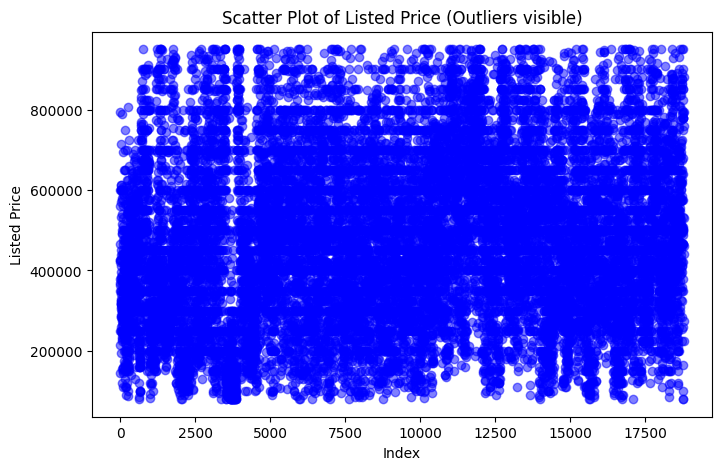

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(range(len(Data)), Data['listed_price'], alpha=0.5, color="blue")
plt.title("Scatter Plot of Listed Price (Outliers visible)")
plt.xlabel("Index")
plt.ylabel("Listed Price")
plt.show()


In [36]:
x=Data.drop(columns='listed_price')
y=Data['listed_price']

In [37]:
y

0        370000
1        365000
2        421000
3        250000
4        145000
          ...  
18778    460000
18779    760000
18780    881000
18781    225000
18782    530000
Name: listed_price, Length: 18783, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import  OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [40]:
ohe=OneHotEncoder()
ohe.fit(x[['City','fuel','transmission','body','oem','model','variant','state','owner_type','Color']])


OneHotEncoder()

In [41]:
column_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_),['City','fuel','transmission','body','oem','model','variant','state','owner_type','Color']),
                                       remainder='passthrough')

In [42]:
lr =LinearRegression()

In [43]:
pipe=make_pipeline(column_trans,lr)

In [44]:
pipe.fit(x_train,y_train)

e:\Car Price Prediction\venv\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['abohar', 'agar malwa', 'agartala', 'agra', 'ahmedabad',
       'ahmednagar', 'ajmer', 'akola', 'aligarh', 'allahabad', 'alwar',
       'ambala', 'ambedkar nagar', 'amravati', 'amreli', 'amritsar',
       'anand', 'anantapur', 'angul', 'ankleshwar',...
       'west bengal'], dtype=object),
                                                                            array(['fifth', 'first', 'fourth', 'second', 'third', 'unregistered car'],
      dtype=object),
                                                                            array(['Black', 'Blue', 'Brown', 'Green', 'Grey', 'Orange', 'Other',
       'Red', 'Silver', 'White', 'Yellow'], dtype=object)]),
                                                  ['City', 'fuel',
                                                   'transmission', 'body',
                                                   'oem', 'model', 'variant',
                                                   'state', 'owner_type',
                                                   'Color'])])),
                ('linearregression', LinearRegression())])

In [45]:
y_pred =pipe.predict(x_test)

In [46]:
y_pred

array([296652.32299078, 618974.13412337, 743579.84349389, ...,
       397685.69386859, 443231.35028192, 334298.04947919], shape=(3757,))

In [47]:
r2_score(y_test,y_pred)

0.832305115130621

In [48]:
scores=[]
for i in range(1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr =LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(x_train,y_train)
    y_pred =pipe.predict(x_test)
    scores.append(r2_score(y_test,y_pred))

In [49]:
np.argmax(scores)

np.int64(418)

In [50]:
scores[np.argmax(scores)]

0.8525153427868145

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=np.argmax(scores))
lr =LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(x_train,y_train)
y_pred =pipe.predict(x_test)
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test, y_pred))

0.8525153427868145
6094582103.297648


In [52]:
import pickle

In [53]:
pickle.dump(pipe,open('LinearRegressorModel.pkl','wb'))

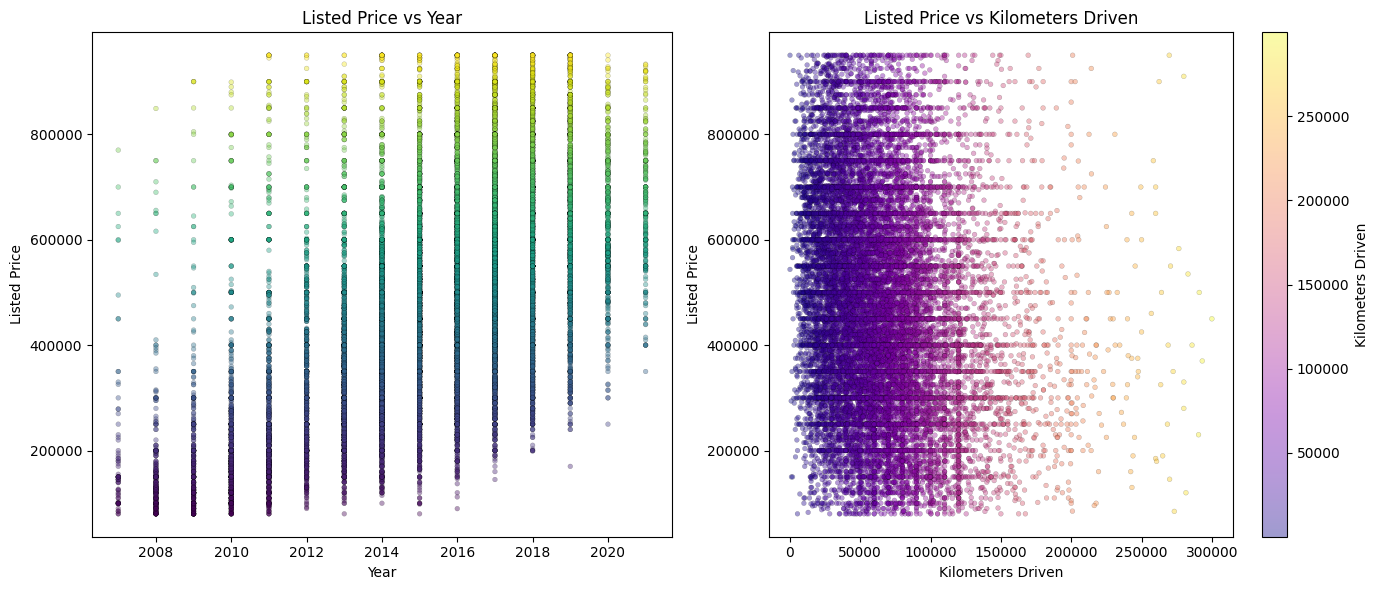

In [54]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14,6))

# --- Plot 1: Listed Price vs Year ---
axes[0].scatter(Data['myear'], Data['listed_price'], 
                c=Data['listed_price'], cmap="viridis", 
                alpha=0.4, s=12, edgecolor="k", linewidth=0.2)
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Listed Price")
axes[0].set_title("Listed Price vs Year")

# --- Plot 2: Listed Price vs KM --- 
sc = axes[1].scatter(Data['km'], Data['listed_price'], 
                     c=Data['km'], cmap="plasma", 
                     alpha=0.4, s=12, edgecolor="k", linewidth=0.2)
axes[1].set_xlabel("Kilometers Driven")
axes[1].set_ylabel("Listed Price")
axes[1].set_title("Listed Price vs Kilometers Driven")

# Add a shared colorbar for the second plot
fig.colorbar(sc, ax=axes[1], label="Kilometers Driven")

plt.tight_layout()
plt.show()


In [55]:
Data['myear'].value_counts()

myear
2015    2840
2016    2686
2017    2570
2014    2503
2018    2128
2013    1358
2019    1218
2012     802
2011     713
2010     626
2020     444
2009     355
2021     235
2008     235
2007      70
Name: count, dtype: int64

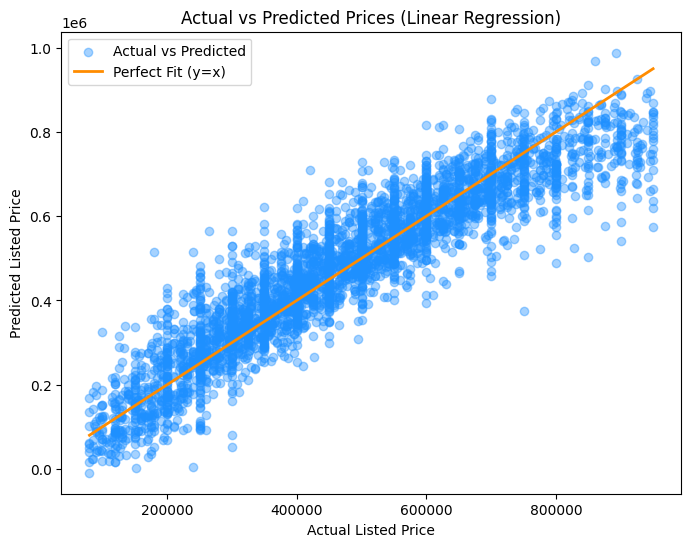

In [56]:


# Scatter plot: Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.4, color="dodgerblue", label="Actual vs Predicted")

# Fit line (ideal line y = x)
line = np.linspace(y_test.min(), y_test.max(), 100)
plt.plot(line, line, color="darkorange", linewidth=2, label="Perfect Fit (y=x)")

plt.xlabel("Actual Listed Price")
plt.ylabel("Predicted Listed Price")
plt.title("Actual vs Predicted Prices (Linear Regression)")
plt.legend()
plt.show()


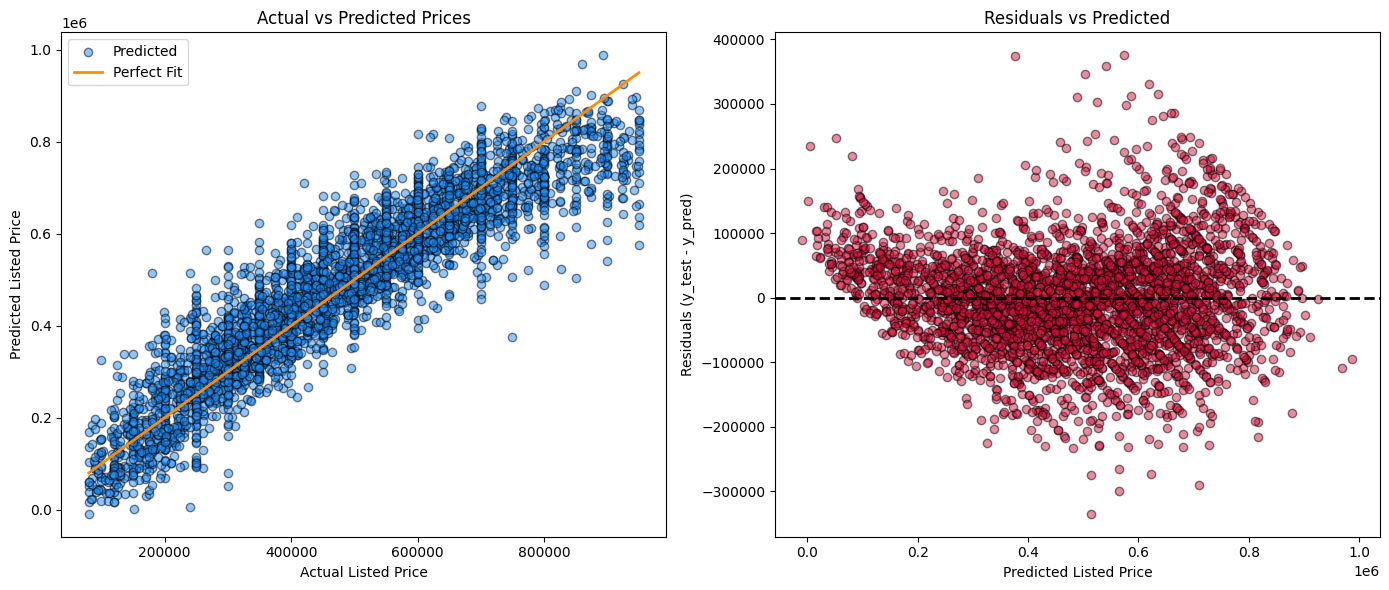

In [57]:

# Predictions already done:
# y_pred = pipe.predict(x_test)

# Residuals  df
residuals = y_test - y_pred

plt.figure(figsize=(14,6))

# --- Plot 1: Actual vs Predicted ---
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5, color="dodgerblue", edgecolor="k", label="Predicted")
line = np.linspace(min(y_test), max(y_test), 100)
plt.plot(line, line, color="darkorange", linewidth=2, label="Perfect Fit")
plt.xlabel("Actual Listed Price")
plt.ylabel("Predicted Listed Price")
plt.title("Actual vs Predicted Prices")
plt.legend()

# --- Plot 2: Residuals ---
plt.subplot(1, 2, 2)
plt.scatter(y_pred, residuals, alpha=0.5, color="crimson", edgecolor="k")
plt.axhline(y=0, color="black", linestyle="--", linewidth=2)
plt.xlabel("Predicted Listed Price")
plt.ylabel("Residuals (y_test - y_pred)")
plt.title("Residuals vs Predicted")

plt.tight_layout()
plt.show()


In [58]:
# IQR method for removing outliers
Q1 = Data['listed_price'].quantile(0.25)
Q3 = Data['listed_price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds  df
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
df_no_outliers = Data[(Data['listed_price'] >= lower_bound) & (Data['listed_price'] <= upper_bound)]

print("Original Data Size:", Data.shape)
print("After Removing Outliers:", df_no_outliers.shape)


Original Data Size: (18783, 13)
After Removing Outliers: (18783, 13)


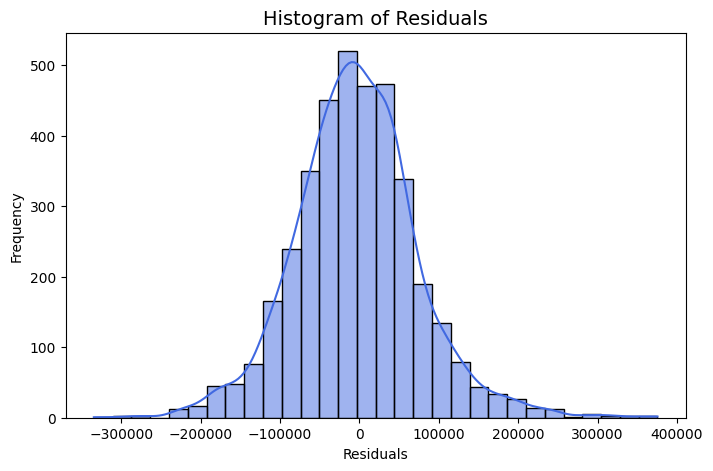

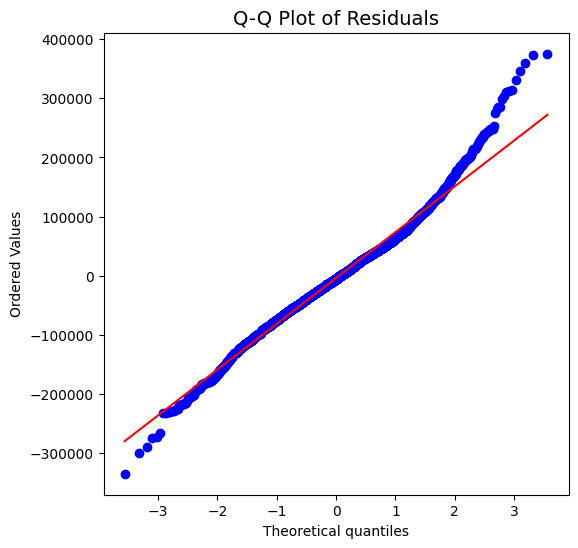

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

# Residuals
residuals = y_test - y_pred

# 1️⃣ Histogram of Residuals

plt.figure(figsize=(8,5))
sns.histplot(residuals, kde=True, color="royalblue", bins=30)
plt.title("Histogram of Residuals", fontsize=14)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# 2️⃣ Q-Q Plot (Quantile-Quantile Plot)

plt.figure(figsize=(6,6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals", fontsize=14)
plt.show()


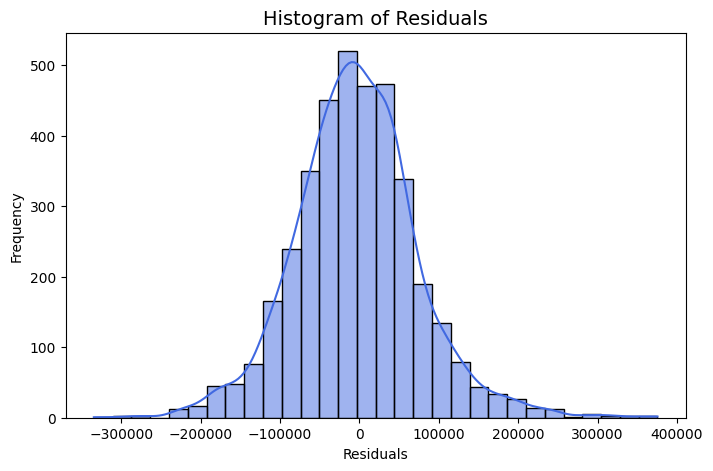

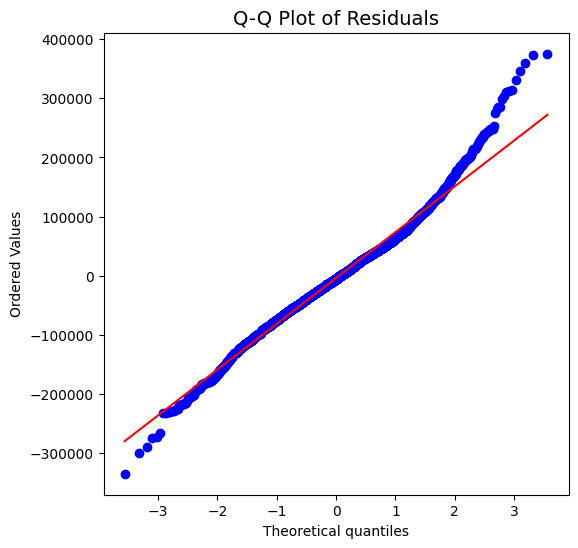

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

# Residuals
residuals = y_test - y_pred

# 1️⃣ Histogram of Residuals
plt.figure(figsize=(8,5))
sns.histplot(residuals, kde=True, color="royalblue", bins=30)
plt.title("Histogram of Residuals", fontsize=14)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# 2️⃣ Q-Q Plot (Quantile-Quantile Plot)
plt.figure(figsize=(6,6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals", fontsize=14)
plt.show()
